----

Nama        : Badriah Nursakinah

Batch       : BSD_005

Dataset     : P1G5_Set_1_badriah_nursakinah.csv

Studi Kasus : Memprediksi `default_payment_next_month` dengan model Classification pada dataset yang sudah di simpan pada format csv

Link Hugging : https://huggingface.co/spaces/nursakinahbadriah/predict_credit_card_default/tree/main

---


# 1. Perkenalan

Problem Statement : Sebagai Data Scientiest saya akan mencoba memprediksi `default_payment_next_month`  dengan model Classification, dimana untuk model inference merupakan kesimpulan akhir yang menjawab proses pengolahan data dengan menggunakan model Classification


Adapun poin-poin yang akan dianalisa dengan mengunakan metode `Explore Data Analysis` diantaranya sebagai berikut :

   - Objective 1 : Memprediksi limit_balance untuk `Age`, `Count`, `Marital_Status`, `Education_Level`
   - Objective 2 : Memprediksi usia yang paling banyak membayar
   - Objective 3 : Memprediksi jumlah pengguna kartu kredit berdasarkan jenis kelamin
   - Objective 4 : Memprediksi pengguna kartu kredit berdsarkan status pernikahan
   - Objective 5 : Memprediksi pengguna kartu kredit berdasarkan usia
   - Objective 6 : Memprediksi limit_limi_balance pada setiap individu
   - Objective 7 : Memprediksi hubungan antara umur dengan limit_balance

# 2. Query SQL

Merupakan hasil proses penyimpanan data yang sudah diolah pada Query SQL dengan menggunaka google platform, dimana data yang sudah pada Query SQL akan disimpan pada format csv. Dimana data yang berformat csv ini nantinya akan digunakan sebagai dataset guna diperlukan pada proses selanjutnya.

`'SELECT limit_balance,
    CAST(sex AS INT) AS sex,
    CAST(education_level AS INT) AS education_level,
    CAST(marital_status AS INT) AS marital_status,
    age,
    pay_0,
    pay_2,
    pay_3,
    pay_4,
    CAST(pay_5 AS FLOAT) AS pay_5,
    CAST(pay_6 AS FLOAT) AS pay_6,
    bill_amt_1,
    bill_amt_2,
    bill_amt_3,
    bill_amt_4,
    bill_amt_5,
    bill_amt_6,
    pay_amt_1,
    pay_amt_2,
    pay_amt_3,
    pay_amt_4,
    pay_amt_5,
    pay_amt_6,
    CAST(default_payment_next_month AS INT) AS default_payment_next_month
FROM
    credit_card_default.ml_datasets
LIMIT 9945`
'''

# 3. Import Libraries

Berikut merupakan beberapa libraries yang digunakan sebagai alat pendukung dalam proses analisa ini dan machine learning framework yang digunakan adalah `Scikit-Learn`

In [1]:

import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import OneHotEncoder
import phik
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from phik.report import plot_correlation_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay
import pickle
import json

# 4. Loading Data

Referensi data yang digunakan bersumber dari proses Query SQL dimana dataset ini akan diolah dan diproses sebagai bahan acuan guna memprediksi `default_payment_next_month` dengan model Classification pada dataset yang sudah di simpan pada format csv.

Adapun tujuan dari proses ini adalah untuk mengimpor atau memuat data dari sumber eksternal ke dalam program atau lingkungan pemrograman tertentu, dimana proses ini merupakan langkah awal dalam analisis data dan pemrosesan data lebih lanjut

In [2]:
# data loading
data = pd.read_csv('P1G5_Set_1_badriah_nursakinah.csv')
data

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
0           80000.0    1                6               1  54.0    0.0    0.0   
1          200000.0    1                4               1  49.0    0.0    0.0   
2           20000.0    2                6               2  22.0    0.0    0.0   
3          260000.0    2                4               2  33.0    0.0    0.0   
4          150000.0    1                4               2  32.0    0.0    0.0   
...             ...  ...              ...             ...   ...    ...    ...   
2960        80000.0    2                3               2  28.0   -1.0   -1.0   
2961        50000.0    2                3               1  51.0   -1.0   -1.0   
2962       450000.0    2                2               1  38.0   -2.0   -2.0   
2963        50000.0    2                2               1  44.0   -2.0   -2.0   
2964       290000.0    2                2               1  39.0    1.0   -2.0   

      pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
0       0.0    0.0      0  ...     29296.0     26210.0     17643.0     2545.0   
1       0.0    0.0      0  ...     50146.0     50235.0     48984.0     1689.0   
2       0.0    0.0      0  ...      1434.0       500.0         0.0     4641.0   
3       0.0    0.0      0  ...     27821.0     30767.0     29890.0     5000.0   
4       0.0   -1.0      0  ...    150464.0    143375.0    146411.0     4019.0   
...     ...    ...    ...  ...         ...         ...         ...        ...   
2960   -1.0   -2.0     -2  ...         0.0         0.0         0.0     2800.0   
2961   -1.0   -1.0     -2  ...         0.0         0.0         0.0      300.0   
2962   -2.0   -2.0     -2  ...       390.0       390.0       390.0      390.0   
2963   -2.0   -2.0     -2  ...       390.0       390.0         0.0      390.0   
2964   -2.0   -2.0     -2  ...      3184.0       390.0       390.0    10000.0   

      pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
0        2208.0     1336.0     2232.0      542.0      348.0   
1        2164.0     2500.0     3480.0     2500.0     3000.0   
2        1019.0      900.0        0.0     1500.0        0.0   
3        5000.0     1137.0     5000.0     1085.0     5000.0   
4      146896.0   157436.0     4600.0     4709.0     5600.0   
...         ...        ...        ...        ...        ...   
2960        0.0        0.0        0.0        0.0        0.0   
2961     5880.0        0.0        0.0        0.0        0.0   
2962      780.0      390.0      390.0      390.0      390.0   
2963      390.0      390.0      390.0        0.0      780.0   
2964      800.0     3184.0      390.0      390.0     6617.0   

      default_payment_next_month  
0                              1  
1                              0  
2                              1  
3                              0  
4                              0  
...                          ...  
2960                           0  
2961                           1  
2962                           1  
2963                           0  
2964                           0  

[2965 rows x 24 columns]

In [3]:
data.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

menampilkan data dengan bentuk array, dimana data dengan type ini akan lebih memudahkan saat melakukan proses handling outlier.

In [4]:
data.describe()

limit_balance          sex  education_level  marital_status  \
count    2965.000000  2965.000000      2965.000000     2965.000000   
mean   163369.308600     1.607757         1.849578        1.559865   
std    125030.415472     0.488333         0.778184        0.522317   
min     10000.000000     1.000000         0.000000        0.000000   
25%     50000.000000     1.000000         1.000000        1.000000   
50%    140000.000000     2.000000         2.000000        2.000000   
75%    230000.000000     2.000000         2.000000        2.000000   
max    800000.000000     2.000000         6.000000        3.000000   

               age        pay_0        pay_2        pay_3        pay_4  \
count  2965.000000  2965.000000  2965.000000  2965.000000  2965.000000   
mean     35.193255     0.005059    -0.122428    -0.141653    -0.185160   
std       9.109439     1.114395     1.180784     1.183630     1.178322   
min      21.000000    -2.000000    -2.000000    -2.000000    -2.000000   
25%      28.000000    -1.000000    -1.000000    -1.000000    -1.000000   
50%      34.000000     0.000000     0.000000     0.000000     0.000000   
75%      41.000000     0.000000     0.000000     0.000000     0.000000   
max      69.000000     8.000000     7.000000     7.000000     8.000000   

             pay_5  ...     bill_amt_4     bill_amt_5     bill_amt_6  \
count  2965.000000  ...    2965.000000    2965.000000    2965.000000   
mean     -0.225295  ...   44089.683305   40956.080607   39773.072513   
std       1.159003  ...   61907.454056   58271.904751   57303.488981   
min      -2.000000  ...  -46627.000000  -46627.000000  -73895.000000   
25%      -1.000000  ...    2582.000000    1958.000000    1430.000000   
50%       0.000000  ...   19894.000000   18814.000000   18508.000000   
75%       0.000000  ...   58622.000000   53373.000000   52287.000000   
max       7.000000  ...  488808.000000  441981.000000  436172.000000   

           pay_amt_1     pay_amt_2      pay_amt_3      pay_amt_4  \
count    2965.000000  2.965000e+03    2965.000000    2965.000000   
mean     6348.902867  6.272494e+03    5150.497133    4561.376054   
std     20885.735336  2.887967e+04   14287.079982   13281.499599   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1013.000000  9.900000e+02     477.000000     313.000000   
50%      2234.000000  2.175000e+03    1994.000000    1600.000000   
75%      5087.000000  5.000000e+03    4500.000000    4000.000000   
max    493358.000000  1.227082e+06  199209.000000  202076.000000   

           pay_amt_5      pay_amt_6  default_payment_next_month  
count    2965.000000    2965.000000                 2965.000000  
mean     4913.286678    5382.701518                    0.214165  
std     16734.340778   17275.953029                    0.410311  
min         0.000000       0.000000                    0.000000  
25%       323.000000     173.000000                    0.000000  
50%      1646.000000    1615.000000                    0.000000  
75%      4021.000000    4081.000000                    0.000000  
max    388071.000000  403500.000000                    1.000000  

[8 rows x 24 columns]

Dari hasil output diatas dapat disimpulkan bahwa jika diambil angka yang `75%` dimana angka ini merupakan angka yang paling besar nilai presentase penggunanya, maka untuk :
- limit_balance terbesar                 : 230000
- sex pengguna kartu kredit              : wanita (code 2)
- education_level pengguna kartu kredit  : Mahasiswa/i (code 2)
- marital_status pengguna kartu kredit   : lajang (code 2)
- usia pengguna kartu kredit             : 41

In [5]:
#cek data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Dari hasil output diatas maka data tidak mmeiliki missing value, artinya dari data diatas dengan `Dtype` sudah sesuai dan tidak perlu diubah lagi

In [6]:
# menampilkan 5 data awal
data.head()

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
0        80000.0    1                6               1  54.0    0.0    0.0   
1       200000.0    1                4               1  49.0    0.0    0.0   
2        20000.0    2                6               2  22.0    0.0    0.0   
3       260000.0    2                4               2  33.0    0.0    0.0   
4       150000.0    1                4               2  32.0    0.0    0.0   

   pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
0    0.0    0.0      0  ...     29296.0     26210.0     17643.0     2545.0   
1    0.0    0.0      0  ...     50146.0     50235.0     48984.0     1689.0   
2    0.0    0.0      0  ...      1434.0       500.0         0.0     4641.0   
3    0.0    0.0      0  ...     27821.0     30767.0     29890.0     5000.0   
4    0.0   -1.0      0  ...    150464.0    143375.0    146411.0     4019.0   

   pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
0     2208.0     1336.0     2232.0      542.0      348.0   
1     2164.0     2500.0     3480.0     2500.0     3000.0   
2     1019.0      900.0        0.0     1500.0        0.0   
3     5000.0     1137.0     5000.0     1085.0     5000.0   
4   146896.0   157436.0     4600.0     4709.0     5600.0   

   default_payment_next_month  
0                           1  
1                           0  
2                           1  
3                           0  
4                           0  

[5 rows x 24 columns]

In [7]:
# menampilkan 5 data akhir
data.tail()

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
2960        80000.0    2                3               2  28.0   -1.0   -1.0   
2961        50000.0    2                3               1  51.0   -1.0   -1.0   
2962       450000.0    2                2               1  38.0   -2.0   -2.0   
2963        50000.0    2                2               1  44.0   -2.0   -2.0   
2964       290000.0    2                2               1  39.0    1.0   -2.0   

      pay_3  pay_4  pay_5  ...  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  \
2960   -1.0   -2.0     -2  ...         0.0         0.0         0.0     2800.0   
2961   -1.0   -1.0     -2  ...         0.0         0.0         0.0      300.0   
2962   -2.0   -2.0     -2  ...       390.0       390.0       390.0      390.0   
2963   -2.0   -2.0     -2  ...       390.0       390.0         0.0      390.0   
2964   -2.0   -2.0     -2  ...      3184.0       390.0       390.0    10000.0   

      pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  \
2960        0.0        0.0        0.0        0.0        0.0   
2961     5880.0        0.0        0.0        0.0        0.0   
2962      780.0      390.0      390.0      390.0      390.0   
2963      390.0      390.0      390.0        0.0      780.0   
2964      800.0     3184.0      390.0      390.0     6617.0   

      default_payment_next_month  
2960                           0  
2961                           1  
2962                           1  
2963                           0  
2964                           0  

[5 rows x 24 columns]

Dari output diatas menampilkan data untuk 5 data paling awal dan 5 data yang paling akhir

In [8]:
# mengganti nama column
data.rename(columns={'pay_0': 'pay_1'},inplace=True)

In [9]:
# cek duplikat data
data.duplicated().sum()

1

Hasil output ini memberikan kesimpulan bahwa adanya data yang duplikat, maka untuk tidak terjadi bias pada saat pengolahan data diproses `Future Engineer` maka data ini akna di lakukan `drop_duplicate`

In [10]:
# drop duplikat data
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

Proses ini menghilangkan data yang duplikat, dan terlihat dari hasil outputnya bahwa data sudah tidak ada yang duplikat maka dapat dilakukan proses selanjutnya

In [11]:
# cek missing value
data.isna().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_1                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Perlu melakukan double check `missing value` dilakukan setelah proses `drop_duplicate`, untuk memastikan apakah data memiliki kondisi yang sama atau ada perubahan terutama pada bagian `missing value`

In [12]:
# cek statistik deskriptif data
data.describe()

limit_balance          sex  education_level  marital_status  \
count    2964.000000  2964.000000      2964.000000     2964.000000   
mean   163356.950067     1.607625         1.849865        1.560054   
std    125049.701016     0.488362         0.778159        0.522304   
min     10000.000000     1.000000         0.000000        0.000000   
25%     50000.000000     1.000000         1.000000        1.000000   
50%    140000.000000     2.000000         2.000000        2.000000   
75%    230000.000000     2.000000         2.000000        2.000000   
max    800000.000000     2.000000         6.000000        3.000000   

               age        pay_1        pay_2        pay_3        pay_4  \
count  2964.000000  2964.000000  2964.000000  2964.000000  2964.000000   
mean     35.193657     0.004723    -0.121795    -0.141026    -0.184548   
std       9.110949     1.114434     1.180479     1.183337     1.178049   
min      21.000000    -2.000000    -2.000000    -2.000000    -2.000000   
25%      28.000000    -1.000000    -1.000000    -1.000000    -1.000000   
50%      34.000000     0.000000     0.000000     0.000000     0.000000   
75%      41.000000     0.000000     0.000000     0.000000     0.000000   
max      69.000000     8.000000     7.000000     7.000000     8.000000   

             pay_5  ...     bill_amt_4     bill_amt_5     bill_amt_6  \
count  2964.000000  ...    2964.000000    2964.000000    2964.000000   
mean     -0.224696  ...   44104.558367   40969.898448   39786.491228   
std       1.158739  ...   61912.600106   58276.878626   57308.498646   
min      -2.000000  ...  -46627.000000  -46627.000000  -73895.000000   
25%      -1.000000  ...    2585.000000    1974.500000    1433.000000   
50%       0.000000  ...   19895.000000   18819.500000   18511.500000   
75%       0.000000  ...   58638.500000   53414.500000   52297.000000   
max       7.000000  ...  488808.000000  441981.000000  436172.000000   

           pay_amt_1     pay_amt_2      pay_amt_3      pay_amt_4  \
count    2964.000000  2.964000e+03    2964.000000    2964.000000   
mean     6351.044872  6.274611e+03    5152.234818    4562.914980   
std     20888.933729  2.888432e+04   14289.177313   13283.476236   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1013.000000  9.975000e+02     479.250000     313.750000   
50%      2238.000000  2.182500e+03    1997.000000    1600.000000   
75%      5089.500000  5.000000e+03    4500.000000    4000.250000   
max    493358.000000  1.227082e+06  199209.000000  202076.000000   

           pay_amt_5      pay_amt_6  default_payment_next_month  
count    2964.000000    2964.000000                 2964.000000  
mean     4914.944332    5384.517544                    0.214238  
std     16736.920951   17278.585006                    0.410362  
min         0.000000       0.000000                    0.000000  
25%       325.250000     175.250000                    0.000000  
50%      1646.500000    1626.500000                    0.000000  
75%      4021.000000    4081.750000                    0.000000  
max    388071.000000  403500.000000                    1.000000  

[8 rows x 24 columns]

Karena dilakukan proses `drop_duplicate` maka perlu dilakukan double check pada proses `cek statistik deskriptif` data .Dan untuk penjelsan untuk hasil output masih sama dengan hasil output yang diatas dimana jika diambil angka yang `75%` dimana angka ini merupakan angka yang paling besar nilai presentase penggunanya, maka untuk :
- limit_balance terbesar                 : 230000
- sex pengguna kartu kredit              : wanita (code 2)
- education_level pengguna kartu kredit  : Mahasiswa/i (code 2)
- marital_status pengguna kartu kredit   : lajang (code 2)
- usia pengguna kartu kredit             : 41

# 5. Exploratory Data Analysis (EDA)

Pada bagian `Exploratory Data Analysis (EDA)` ini akan lebih memfokuskan pada eksplorasi data dari dataset yang digunakan. Eksplorasi ini dilakukan dengan menggunakan berbagai teknik, seperti query, grouping, visualisasi sederhana, dan lainnya.


In [13]:
# Membuat kolom baru bernama chol2
penampung = []
for i in data['age']:
  if i > 45:
    penampung.append('Lansia')
  elif i > 25:
    penampung.append('Dewasa')
  elif i < 25:
    penampung.append('Remaja')
  else:
    penampung.append('Kanak-Kanak')
  
data['Klasifikasi'] = penampung

data

limit_balance  sex  education_level  marital_status   age  pay_1  pay_2  \
0           80000.0    1                6               1  54.0    0.0    0.0   
1          200000.0    1                4               1  49.0    0.0    0.0   
2           20000.0    2                6               2  22.0    0.0    0.0   
3          260000.0    2                4               2  33.0    0.0    0.0   
4          150000.0    1                4               2  32.0    0.0    0.0   
...             ...  ...              ...             ...   ...    ...    ...   
2960        80000.0    2                3               2  28.0   -1.0   -1.0   
2961        50000.0    2                3               1  51.0   -1.0   -1.0   
2962       450000.0    2                2               1  38.0   -2.0   -2.0   
2963        50000.0    2                2               1  44.0   -2.0   -2.0   
2964       290000.0    2                2               1  39.0    1.0   -2.0   

      pay_3  pay_4  pay_5  ...  bill_amt_5  bill_amt_6  pay_amt_1  pay_amt_2  \
0       0.0    0.0      0  ...     26210.0     17643.0     2545.0     2208.0   
1       0.0    0.0      0  ...     50235.0     48984.0     1689.0     2164.0   
2       0.0    0.0      0  ...       500.0         0.0     4641.0     1019.0   
3       0.0    0.0      0  ...     30767.0     29890.0     5000.0     5000.0   
4       0.0   -1.0      0  ...    143375.0    146411.0     4019.0   146896.0   
...     ...    ...    ...  ...         ...         ...        ...        ...   
2960   -1.0   -2.0     -2  ...         0.0         0.0     2800.0        0.0   
2961   -1.0   -1.0     -2  ...         0.0         0.0      300.0     5880.0   
2962   -2.0   -2.0     -2  ...       390.0       390.0      390.0      780.0   
2963   -2.0   -2.0     -2  ...       390.0         0.0      390.0      390.0   
2964   -2.0   -2.0     -2  ...       390.0       390.0    10000.0      800.0   

      pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  default_payment_next_month  \
0        1336.0     2232.0      542.0      348.0                           1   
1        2500.0     3480.0     2500.0     3000.0                           0   
2         900.0        0.0     1500.0        0.0                           1   
3        1137.0     5000.0     1085.0     5000.0                           0   
4      157436.0     4600.0     4709.0     5600.0                           0   
...         ...        ...        ...        ...                         ...   
2960        0.0        0.0        0.0        0.0                           0   
2961        0.0        0.0        0.0        0.0                           1   
2962      390.0      390.0      390.0      390.0                           1   
2963      390.0      390.0        0.0      780.0                           0   
2964     3184.0      390.0      390.0     6617.0                           0   

      Klasifikasi  
0          Lansia  
1          Lansia  
2          Remaja  
3          Dewasa  
4          Dewasa  
...           ...  
2960       Dewasa  
2961       Lansia  
2962       Dewasa  
2963       Dewasa  
2964       Dewasa  

[2964 rows x 25 columns]

Tujuan dari proses diatas adalah untuk membuat kolom baru bernama 'chol2' (dari hasil menampilkan data set pada columns 5 awal dan akhir)yang digabungkan, berdasarkan klasifikasi usia yang diberikan dalam kolom 'age' pada suatu dataset.

In [14]:
# grouping data dan dibuat dalam dataframe

data_age = pd.DataFrame(data.groupby('Klasifikasi')['Klasifikasi'].value_counts())

data_age

count
Klasifikasi       
Dewasa        2136
Kanak-Kanak    119
Lansia         438
Remaja         271

Hasil output diatas menjelaskan banyaknya pengguna kartu kredit berdasarkan usia

In [15]:
# Data yang akan dipakai untuk plot
data_sorted = data_age.sort_values(by='count', ascending = False).reset_index()

### **Objective 1 : Analisa Limit Balance Untuk 'Age', 'Count', 'Marital Status', 'Education Level'**

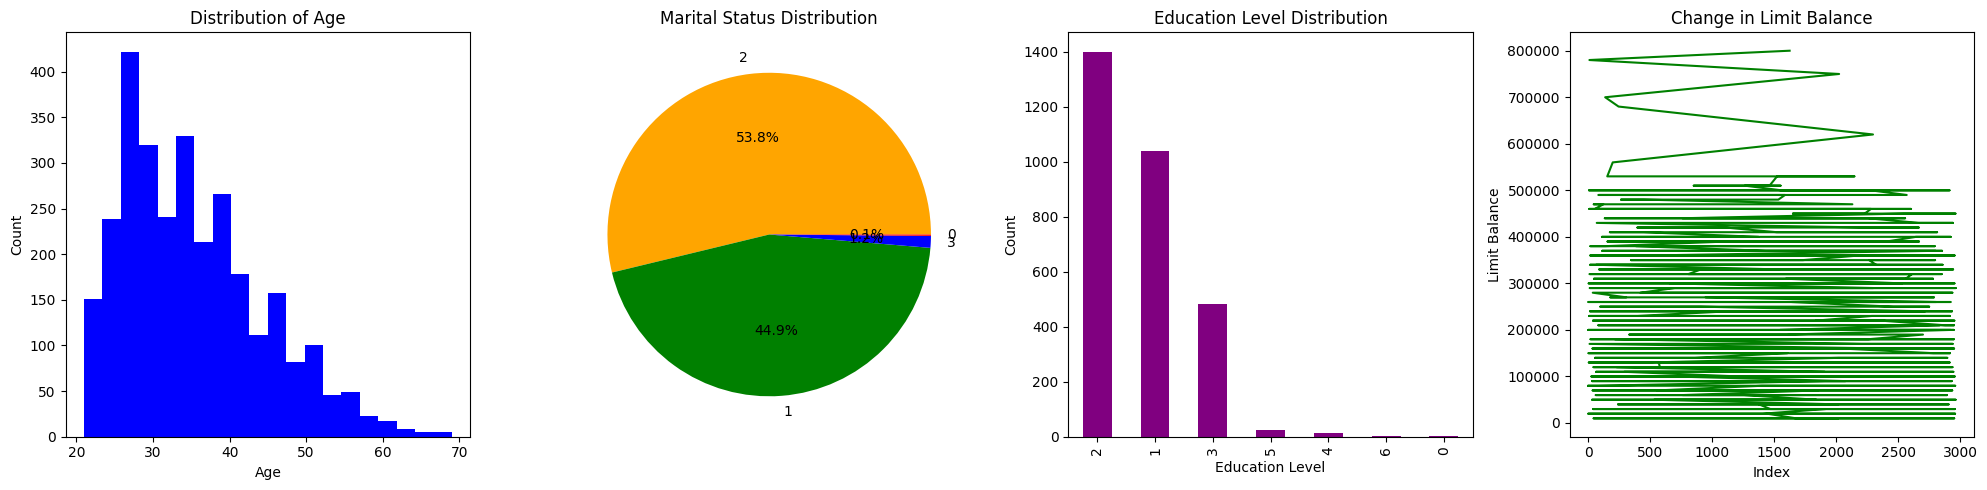

In [16]:

# Membuat subplots dengan 1 baris dan 4 kolom
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Grafik 1: Histogram
data['age'].plot(kind='hist', bins=20, ax=axs[0], color='blue')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribution of Age')

# Grafik 2: Pie Chart
marital_status_counts = data['marital_status'].value_counts()
marital_status_counts.plot(kind='pie', autopct='%1.1f%%', ax=axs[1], colors=['orange', 'green', 'blue', 'red'])
axs[1].set_title('Marital Status Distribution')
axs[1].set_ylabel('')

# Grafik 3: Bar Chart
education_counts = data['education_level'].value_counts()
education_counts.plot(kind='bar', ax=axs[2], color='purple')
axs[2].set_xlabel('Education Level')
axs[2].set_ylabel('Count')
axs[2].set_title('Education Level Distribution')

# Grafik 4: Line Chart
limit_balance_sorted = data['limit_balance'].sort_values()
axs[3].plot(limit_balance_sorted, color='green')
axs[3].set_xlabel('Index')
axs[3].set_ylabel('Limit Balance')
axs[3].set_title('Change in Limit Balance')

# Menampilkan grafik
plt.tight_layout()
plt.show()

kesimpulan untuk ke grafik diatas ini untuk 
- Grafik Distribusi Usia              : Dari tren grafik histogram dapat disimpulkan untuk ditribusi usia rata-rata pengguna kartu kredit diatas usia 30 tahun

- Grafik Distribusi Status Perkawinan : Dari tren grafik phie chart dapat disimpulkan pengguna kartu kredit dengan jumlah presentase mencapai 53.8% berstatus masih lajang

- Grafik Distribusi Pendidikan        : Tren grafik batang  ini menunjukkan hampir 1400 menggunakan kartu kredit jika ditinjau dari segi level pendidikan yaitu Mahasiswa/

- Grafik Distribusi Saldo Limit       : Tren grafik menunjukkan perubahan saldo limit dari waktu ke waktu. Dimana garis hijau menunjukkan peningkatan saldo limit, sedangkan garis merah menunjukkan penurunan saldo limit.

### **Objective 2 : Memprediksi Usia Yang Paling Banyak Membayar**

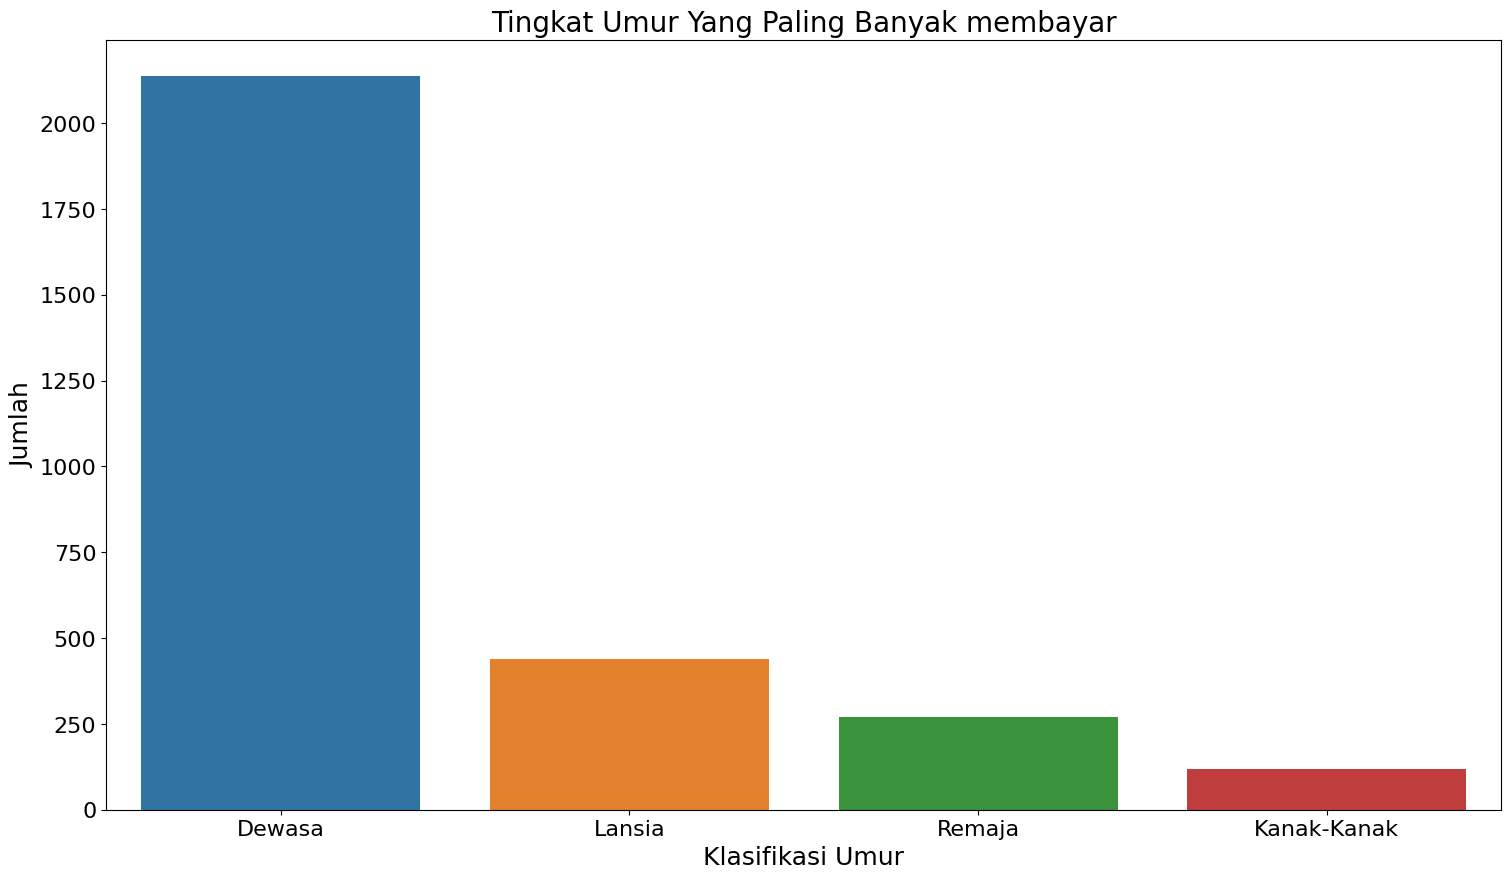

In [17]:
# Set ukuran figure
plt.figure(figsize=(18, 10))

# Plot bar graph untuk jenis liga
ax = sns.barplot(x='Klasifikasi', y='count', hue='Klasifikasi', data=data_sorted)

# Set font size for axis labels
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Labelling the graph
plt.title('Tingkat Umur Yang Paling Banyak membayar', fontsize = 20)
plt.xlabel('Klasifikasi Umur', fontsize = 18)
plt.ylabel('Jumlah', fontsize = 18)

# Show final plot
plt.show()

Grafik tersebut menunjukkan bahwa kelompok umur yang membayar paling tinggi adalah `Dewasa`. Kelompok ini mungkin membayar paling banyak karena mereka mempunyai pendapatan lebih tinggi dibandingkan kelompok umur lainnya. Kelompok `Lansia` mungkin membayar paling banyak kedua karena mereka mungkin memiliki biaya pengobatan yang lebih banyak. Kelompok `Remaja` mungkin membayar paling banyak ketiga karena mereka mungkin membeli lebih banyak produk dan jasa dibandingkan kelompok `Kanak-Kanak`. Kelompok `Kanak-Kanak`mungkin membayar paling banyak keempat karena mereka mungkin membeli lebih sedikit produk dan jasa dibandingkan kelompok usia lainnya. Kelompok `Klasifikasi Umur` mungkin membayar paling sedikit karena mereka mungkin tidak mampu membayar barang dan jasa.

### **Objective 3: Analisa Jumlah Pengguna Berdasarkan Jenis Kelamin**

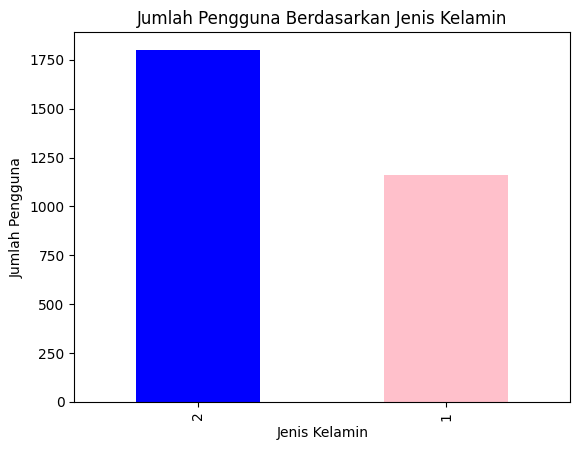

In [18]:

# Menghitung jumlah pengguna berdasarkan sex
jumlah_pengguna = data['sex'].value_counts()

# Membuat diagram batang
colors = ['blue', 'pink']  # Daftar warna yang akan digunakan
jumlah_pengguna.plot(kind='bar', color=colors)

# Menambahkan keterangan jenis kelamin
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pengguna')
plt.title('Jumlah Pengguna Berdasarkan Jenis Kelamin')


plt.show()


Berdasarkan tren yang ada, diprediksikan gender wanita lebih banyak menggunakan kartu kredit

### **Objective 4: Analisa Jumlah Pengguna Berdasarkan Status Pernikahan**

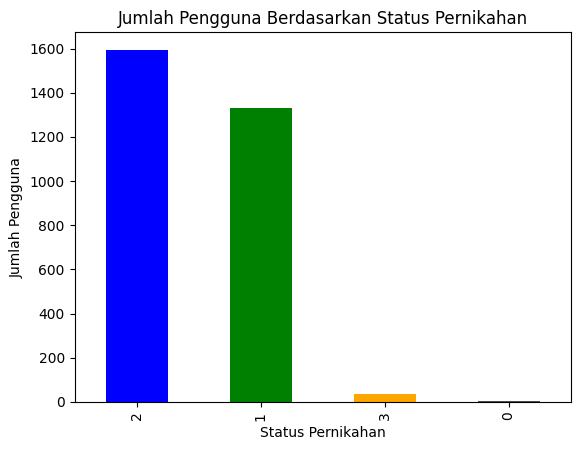

In [19]:

# Menghitung jumlah pengguna berdasarkan marital_status
jumlah_pengguna = data['marital_status'].value_counts()

# Membuat diagram batang
colors = ['blue', 'green', 'orange', 'red']  # Daftar warna yang akan digunakan
jumlah_pengguna.plot(kind='bar', color=colors)

# Menambahkan keterangan status pernikahan
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah Pengguna')
plt.title('Jumlah Pengguna Berdasarkan Status Pernikahan')


plt.show()

Berdasarkan tren diatas, diprediksikan bahwa jumlah banyaknya pengguna kartu kredit lebih cenderung yang masih lajang

### **Objective 5 : Analisa Jumlah Kartu Kredit Berdasarkan Usia**

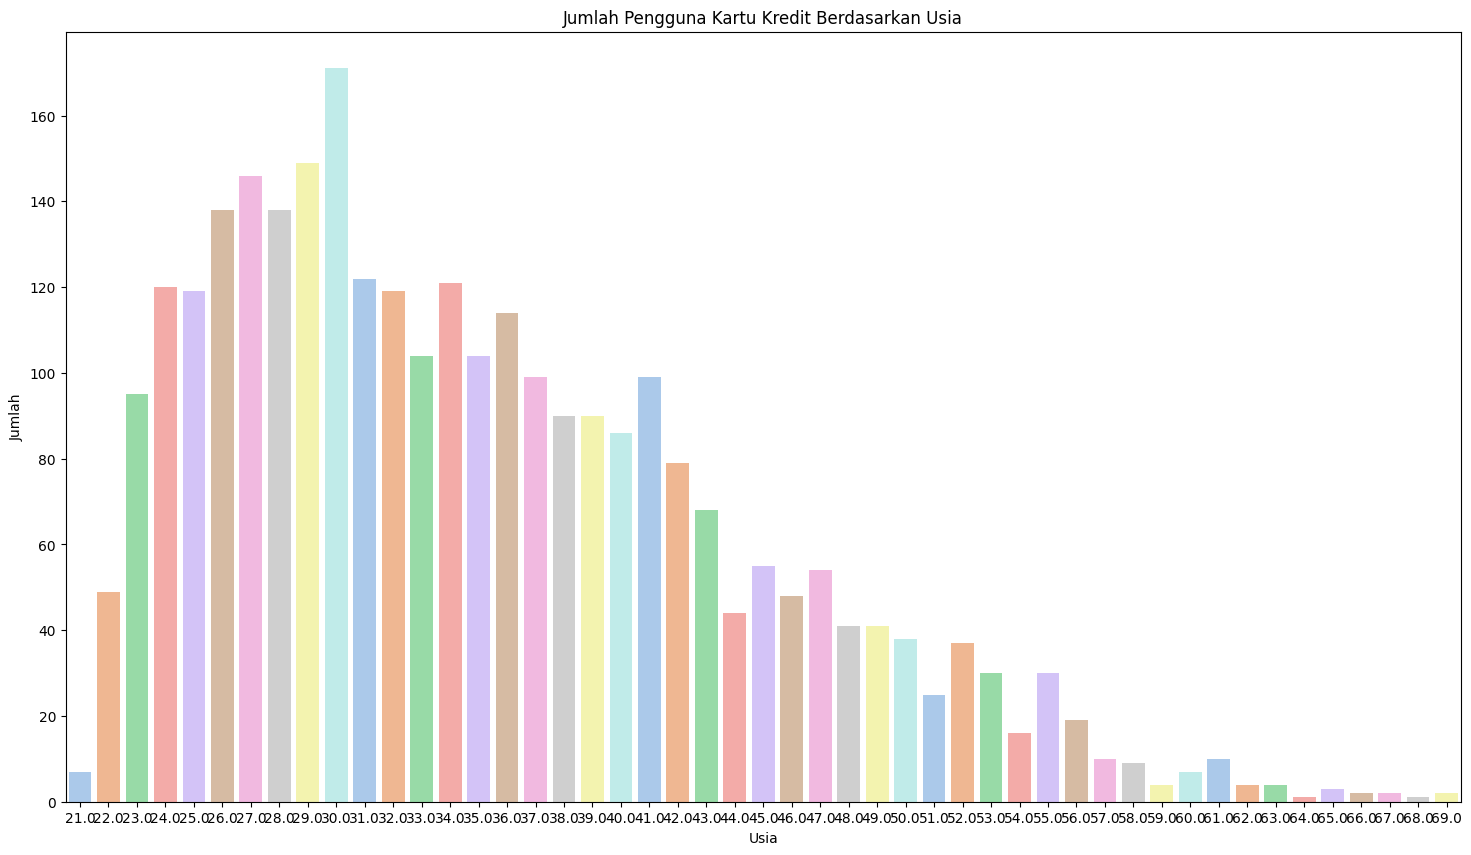

In [20]:

# Set ukuran figure
plt.figure(figsize=(18, 10))

# Menghitung jumlah pengguna berdasarkan usia
education_counts = data['age'].value_counts()

# Membuat diagram batang
colors = sns.color_palette('pastel')  # Menggunakan palet warna 'pastel'
sns.barplot(x=education_counts.index, y=education_counts.values, palette=colors)

plt.title('Jumlah Pengguna Kartu Kredit Berdasarkan Usia')
plt.xticks(rotation=360)  # Ubah rotasi label x-axis sesuai kebutuhan
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

Dari tren grafik diagram batang secara spesifik, kelompok usia pengguna kartu kredit terbanyak adalah antara 45 hingga 64 tahun. Diikuti oleh kelompok umur antara 25 dan 44 tahun.



### **Objective 6 : Analisa Prediksi Limit Balance**

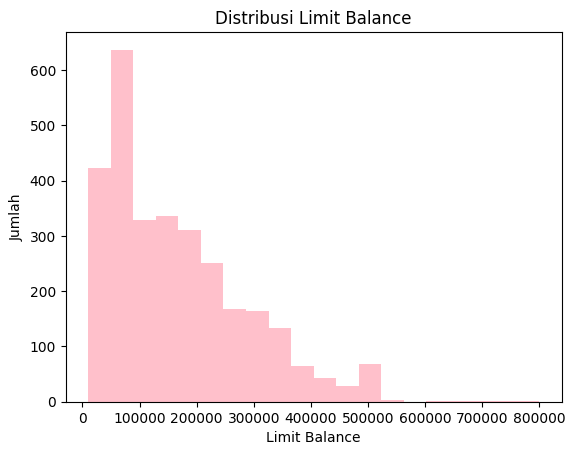

In [21]:

# Mengambil kolom "limit_balance"
limit_balance = data['limit_balance']

# Membuat histogram
plt.hist(limit_balance, bins=20, color='pink')
plt.xlabel('Limit Balance')
plt.ylabel('Jumlah')
plt.title('Distribusi Limit Balance')
plt.show()

Hasil tren histogram menunjukkan bahwa kebanyakan orang memiliki batas saldo antara $100.000 dan $300.000. Batang di sisi kiri dan kanan grafik menunjukkan bahwa lebih sedikit orang yang memiliki saldo batas sangat rendah atau sangat tinggi.

### **Objective 7 : Analisa Hubungan Antara Umur Dengan Limit Balance**

<Axes: xlabel='sex', ylabel='count'>

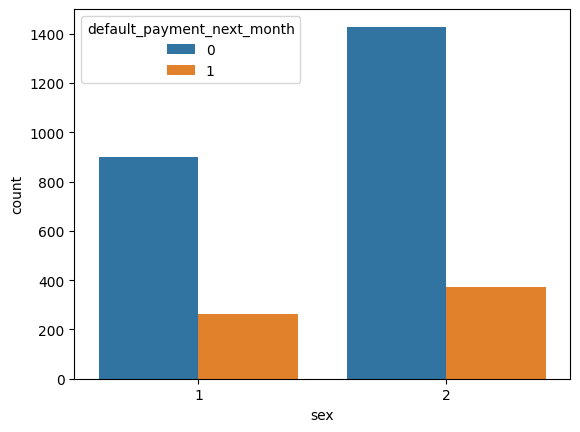

In [22]:
sns.countplot(x='sex', data=data,hue="default_payment_next_month")

# 6. Feature Engineering

Karena akan melakukan model `Classification` pada dataset, maka data akan dibagi menjadi feature X dan label/target y. Lalu kedua dataset tersebut juga akan dibagi menjadi train-set dan test-set. Sebelum split data, maka langkah awal akan membuat variable baru `data_inf` yang bertujuan untuk train data inference sehingga tidak perlu untuk menginput secara manual di inference dan tujuan dari proses ini adalah untuk mengubah atau membuat fitur-fitur baru yang lebih informatif atau lebih sesuai dengan masalah yang ingin diselesaikan.

In [23]:
# menyimpan 1 data random dari data asli untuk digunakan sebagai data inference ke dalam variabel data_inf
data_inf = data.sample(1, random_state=0)

# menghapus data inference dari df
data.drop(data_inf.index, inplace=True)

# melakukan reset index untuk data_inf dan df
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

#simpan ke csv
data_inf.to_csv('data_inf')

### **Model Missing Value**

Proses ini memiliki cara kerja untuk menangani nilai yang hilang (missing value) yang ada di dalamnya. Dimana proses missing value ini lebih bertujuan untuk mencegah bias dalam proses analisis selanjutnya.

In [24]:
# Cek data yang kolomnya memiliki nilai
data.isna().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_1                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
Klasifikasi                   0
dtype: int64

### **Split Feature `X` dan Target `y`**

 Proses ini yaitu melakukan pemisahan antara label dengan fitur dimana secara keseluruhan, pemisahan fitur (X) dan variabel target (y) merupakan langkah penting dalam machine learning sehingga dapat menggeneralisasi dengan baik terhadap contoh-contoh yang tidak terlihat. Adapun tujuan dari proses ini adalah untuk  mempersiapkan data yang akan digunakan dalam pemodelan atau analisis prediktif. Yang pada umumnya, pemisahan fitur X (variabel independen) yang digunakan sebagai input untuk memprediksi target y (variabel dependen).

In [25]:
#Splitting dataset X (feature) dan y (target)

X = data.drop(['default_payment_next_month'], axis = 1)
y = data['default_payment_next_month']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify=y,
                                                    random_state=42)

### **Split Numerical Columns and Categorical Columns**

Proses split numerical columns dan Categorical columns ini bertujuan untuk memisahkan kolom-kolom berdasarkan jenis data Dengan memisahkan kolom numerik dan kolom kategorikal, dimana hal ini dapat mengoptimalkan pemrosesan, analisis, dan visualisasi data dengan memperlakukan setiap jenis data secara terpisah

Adapun tujuan dari proses Split Numerical Columns and Categorical Columns pada data adalah untuk memisahkan variabel numerik (numerical) dan variabel kategorikal (categorical) dalam dataset. Dimana pemisahan ini merupakan langkah yang begitu penting, dikarenakan variabel numerik dan kategorikal sering kali memerlukan perlakuan yang berbeda dalam analisis atau pemodelan data.

In [27]:
# proses melakukan split kolom numerik dan kategori
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
num_cols = X_train.select_dtypes(exclude='object').columns.tolist()

### **Feature Selection**

*Feature selection* merupakan dalam bagian proses dimana fitur yang akan dimasukkan ke model akan diseleksi berdasarkan adanya korelasi dengan target. Dikarenakan pada bagian ini, fitur-fitur yang tidak memiliki pengaruh terhadap target akan dihapus (drop) dengan cara memeriksa korelasinya . Adapun Tujuan dari feature selection (pemilihan fitur) adalah untuk mengidentifikasi dan memilih subset fitur yang paling relevan atau informatif dari suatu dataset. Dalam proses ini, fitur-fitur yang tidak memberikan kontribusi signifikan terhadap pemodelan atau analisis dapat dieliminasi, sementara fitur-fitur yang penting dipertahankan.

In [28]:
# cek total unik data
X_train[num_cols].nunique()

limit_balance        58
sex                   2
education_level       7
marital_status        4
age                  47
pay_1                11
pay_2                10
pay_3                 9
pay_4                10
pay_5                 9
pay_6                 8
bill_amt_1         2125
bill_amt_2         2107
bill_amt_3         2071
bill_amt_4         2036
bill_amt_5         2009
bill_amt_6         1986
pay_amt_1          1186
pay_amt_2          1138
pay_amt_3          1086
pay_amt_4          1011
pay_amt_5           988
pay_amt_6           989
dtype: int64

Pada kondisi dengan data diatas, saya akan membuat kondisi di mana data yang dimiliki memang berbentuk numerik. Namun, terdapat pula data kategorikal di dalamnya. Oleh karena itu, data akan dipisahkan dengan membuat parameter > 11 yang termasuk data kategorikal. Dimana nantinya hasil ouput pada data memiliki kondisi numerical yang berisi kolom-kolom dengan jumlah nilai unik lebih dari 11, dan categorical_num yang berisi kolom-kolom dengan jumlah nilai unik 11 atau kurang

In [29]:
numerical = []
categorical_num = []
for i in num_cols:
    if X_train[i].nunique()>11:
        numerical.append(i)
    else:
        categorical_num.append(i)
print(numerical)
print(categorical_num)

['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
['sex', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


Dapat disimpulkan bahwa dari hasil ouput pada data memiliki kondisi numerical yang berisi kolom-kolom dengan jumlah nilai unik lebih dari 11, dan categorical_num yang berisi kolom-kolom dengan jumlah nilai unik 11 atau kurang

In [30]:
# memanggil data kategorikal
X_train[categorical_num]

sex  education_level  marital_status  pay_1  pay_2  pay_3  pay_4  pay_5  \
1968    2                2               1   -2.0   -2.0   -1.0    2.0      2   
2725    1                2               2    0.0    0.0    0.0   -2.0     -2   
443     1                2               1    0.0    0.0    0.0    0.0      0   
825     2                2               1    0.0    0.0    0.0    0.0      0   
664     2                2               1    0.0    0.0    0.0    0.0      0   
...   ...              ...             ...    ...    ...    ...    ...    ...   
2604    2                1               2   -2.0   -2.0   -2.0   -2.0     -2   
1478    2                3               1    2.0    2.0    2.0    0.0      0   
617     2                2               1    0.0    0.0    0.0    0.0      0   
1993    2                3               1    2.0    2.0    2.0    2.0      3   
1897    2                2               1    1.0    3.0    2.0    2.0      2   

      pay_6  
1968     -2  
2725     -2  
443       0  
825       0  
664       0  
...     ...  
2604     -2  
1478      0  
617       0  
1993      2  
1897      0  

[2370 rows x 9 columns]

Hasil output diatas menampilkan semua data yang memiliki kondisi katgorikal

In [31]:
# memisahkan data nominal dan ordinal
nominal = ['sex','marital_status']
ordinal =['education_level',  'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

Dengan memisahkan data nominal dan ordinal, maka saya dapat menerapkan metode atau teknik analisis yang sesuai untuk setiap jenis data, karena karakteristik dan sifat data nominal dan ordinal berbeda.

### **Handling Outlier**

Proses handling outlier pada `Feature Engineer` ini saya memilih proses `capping skew Winsorizer` dikarenakan jumlah `outlier` tidak banyak untuk handling. Esensi dari proses `capping skew Winsorizer` dimana proses ini cenderung lebih sederhana dan memerlukan sedikit komputasi dibandingkan dengan melatih model pembelajaran mesin untuk menangani outlier jika ditinjau dari ketersediaan data dan komputasi

In [32]:
# penampungan data
skew = []
not_skew =[]

#membuat kondisi pengecekan skew data.
for i in numerical:
    if X_train[i].skew() > -0.5 and X_train[i].skew() < 0.5:
        not_skew.append(i)
    else:
        skew.append(i)
print('skew',skew)
print('not skew',not_skew)

skew ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
not skew []


Hasil output diatas merupakan hasil dari proses pengecekan data apakah memiliki sifat `skew distribution` atau `tidak`

In [33]:
# Proses capping skewed
winsoriser_skewed = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,# memilih nilai 1,5 karena skew tidak extreme 
                             variables=skew)


Tujuan dengan menggunakan ` capping skew` dilakukan untuk mengurangi pengaruh outlier dan mengatasi masalah distribusi data yang tidak simetris.

In [34]:
X_train_cap = winsoriser_skewed.fit_transform(X_train)
X_test_cap = winsoriser_skewed.fit_transform(X_test)

Langkah awal dalam proses seleksi fitur saya akan melakukan pengecekan korelasi menggunakan `phik`

In [35]:
#menghitung nilai korelasi menggunakan fitur phik

combined_train_data = pd.concat([X_train_cap,y_train],axis=1)
phik_overview = combined_train_data.phik_matrix()
phik_overview['default_payment_next_month']

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


limit_balance                 0.237051
sex                           0.030504
education_level               0.072756
marital_status                0.000000
age                           0.056337
pay_1                         0.624816
pay_2                         0.491306
pay_3                         0.337561
pay_4                         0.317012
pay_5                         0.310919
pay_6                         0.385757
bill_amt_1                    0.050579
bill_amt_2                    0.047317
bill_amt_3                    0.039870
bill_amt_4                    0.062772
bill_amt_5                    0.046389
bill_amt_6                    0.033454
pay_amt_1                     0.204781
pay_amt_2                     0.197974
pay_amt_3                     0.199761
pay_amt_4                     0.156310
pay_amt_5                     0.111837
pay_amt_6                     0.198784
Klasifikasi                   0.089455
default_payment_next_month    1.000000
Name: default_payment_nex

Hasil output diatas menjelaskan bahwa beberapa 'columns' yang memiliki atau tidak memiliki korelasi dengan variabel `default_payment_next_month`

In [36]:
# menggambil korelasi
phik_overview['default_payment_next_month']
features =[]
for i in X_train.columns.tolist():
    if phik_overview['default_payment_next_month'][i]> 0.1:# mengambil nilai korelasi diatas 0,1
        features.append(i)
features

['limit_balance',
 'pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6']

Hasil output diatas memberikan gambaran terkait variabel yang memiliki korelasi dengan  `default_payment_next_month` 

In [37]:
num_cols =['limit_balance','pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']

cat_ord = ['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']

Hasil output diatas memberikan gambaran terkait variabel yang sudah dipisahkan dengan numerik dan kategorikal

In [38]:
# membuat variable untuk pengujian
X_train_features = X_train_cap[features]
X_test_features = X_test_cap[features]

In [39]:
# cek data baru
X_train_features

limit_balance  pay_1  pay_2  pay_3  pay_4  pay_5  pay_6  pay_amt_1  \
1968        80000.0   -2.0   -2.0   -1.0    2.0      2     -2      0.000   
2725       180000.0    0.0    0.0    0.0   -2.0     -2     -2   1110.000   
443        310000.0    0.0    0.0    0.0    0.0      0      0  11171.625   
825        270000.0    0.0    0.0    0.0    0.0      0      0   2500.000   
664        380000.0    0.0    0.0    0.0    0.0      0      0   9000.000   
...             ...    ...    ...    ...    ...    ...    ...        ...   
2604       270000.0   -2.0   -2.0   -2.0   -2.0     -2     -2    592.000   
1478        30000.0    2.0    2.0    2.0    0.0      0      0   3280.000   
617        160000.0    0.0    0.0    0.0    0.0      0      0   8450.000   
1993        30000.0    2.0    2.0    2.0    2.0      3      2   1700.000   
1897        10000.0    1.0    3.0    2.0    2.0      2      0      0.000   

      pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  
1968  11049.375        0.0      0.000        0.0        0.0  
2725      0.000        0.0      0.000        0.0        0.0  
443   11049.375     2500.0   9527.875     3000.0     4377.0  
825    2000.000     2000.0   2000.000     2000.0     2000.0  
664    9000.000    10068.0   8768.000     9087.0     9133.0  
...         ...        ...        ...        ...        ...  
2604   1593.000      913.0   1471.000     1302.0     7107.0  
1478      0.000     1511.0    609.000      500.0      800.0  
617    5289.000     4022.0   4195.000     3986.0     3958.0  
1993   1200.000     1600.0      0.000     1500.0        0.0  
1897      0.000     3000.0      0.000      500.0     1000.0  

[2370 rows x 13 columns]

Hasil output diatas merupakan variable untuk pengujian. Dengan membuat variabel X_train_features dan X_test_features, saya dapat mempersiapkan data yang akan digunakan untuk menguji model. Dimana variabel-variabel ini terdiri dari fitur-fitur yang telah melalui proses capping dan telah dipilih berdasarkan daftar features yang relevan. Dalam proses pengujian, saya akan menggunakan variabel ini sebagai input untuk model yang telah dilatih sebelumnya

### **Model Pipeline**

Pipline berfungsi untuk menggabungkan proses `encoding` dan proses `scaling`. Dimana menggunakan pipeline dalam proses feature engineering dapat mencegah terjadinya kebocoran informasi (data leakage).

In [40]:
# membuat scaler
scaler = StandardScaler()


In [41]:
# transform berdasarkan scallar
preprocessor = ColumnTransformer([('scaling',scaler,num_cols)],remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling', StandardScaler(),
                                 ['limit_balance', 'pay_amt_1', 'pay_amt_2',
                                  'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
                                  'pay_amt_6'])])

In [42]:
# proses transformasi
X_train_final = preprocessor.fit_transform(X_train_features)
X_train_final_data = pd.DataFrame(X_train_final, columns= list(preprocessor.get_feature_names_out()))
X_train_final_data

scaling__limit_balance  scaling__pay_amt_1  scaling__pay_amt_2  \
0                  -0.686097           -1.028015            2.133638   
1                   0.138932           -0.713036           -1.007524   
2                   1.211471            2.142103            2.133638   
3                   0.881459           -0.318602           -0.438955   
4                   1.788992            1.525872            1.551033   
...                      ...                 ...                 ...   
2365                0.881459           -0.860026           -0.554659   
2366               -1.098612           -0.097265           -1.007524   
2367               -0.026074            1.369801            0.496055   
2368               -1.098612           -0.545614           -0.666383   
2369               -1.263618           -1.028015           -1.007524   

      scaling__pay_amt_3  scaling__pay_amt_4  scaling__pay_amt_5  \
0              -0.917534           -0.907005           -0.908620   
1              -0.917534           -0.907005           -0.908620   
2              -0.184365            2.288891            0.103903   
3              -0.330999           -0.236153           -0.233605   
4               2.035084            2.034009            2.158312   
...                  ...                 ...                 ...   
2365           -0.649781           -0.413593           -0.469185   
2366           -0.474407           -0.702730           -0.739866   
2367            0.261988            0.500107            0.436685   
2368           -0.448306           -0.907005           -0.402359   
2369           -0.037732           -0.907005           -0.739866   

      scaling__pay_amt_6  remainder__pay_1  remainder__pay_2  \
0              -0.881127              -2.0              -2.0   
1              -0.881127               0.0               0.0   
2               0.504560               0.0               0.0   
3              -0.247959               0.0               0.0   
4               2.010233               0.0               0.0   
...                  ...               ...               ...   
2365            1.368834              -2.0              -2.0   
2366           -0.627860               2.0               2.0   
2367            0.371912               0.0               0.0   
2368           -0.881127               2.0               2.0   
2369           -0.564543               1.0               3.0   

      remainder__pay_3  remainder__pay_4  remainder__pay_5  remainder__pay_6  
0                 -1.0               2.0               2.0              -2.0  
1                  0.0              -2.0              -2.0              -2.0  
2                  0.0               0.0               0.0               0.0  
3                  0.0               0.0               0.0               0.0  
4                  0.0               0.0               0.0               0.0  
...                ...               ...               ...               ...  
2365              -2.0              -2.0              -2.0              -2.0  
2366               2.0               0.0               0.0               0.0  
2367               0.0               0.0               0.0               0.0  
2368               2.0               2.0               3.0               2.0  
2369               2.0               2.0               2.0               0.0  

[2370 rows x 13 columns]

# 7. Model Definition

Pada model definitioan saya akan menggunakan model  `logistic regression`, `SVM`, dan `KNN` dimana ketiga model ini akan diuji dengan proses `hyperparameter tuning` untuk dapat menghasilkan nilai F-1 score. Hasil F-1 score yang didapat ini nantinya akan dibandingkan dari ketiga model tersebut dan diambil nilai mana yang lebih besar guna dapat mengetahui model mana yang paling baik digunakan pada proses `Model Evaluation`

kasih penjelsan mengapa memilih metoide F-1 score, Crossvall dan kenapa menggunakan capping outlier

In [43]:
logreg_pipe = Pipeline([('preprocessing', preprocessor), 
                        ('logreg', LogisticRegression(random_state=42))])

svm_pipe = Pipeline([('preprocessing', preprocessor), 
                        ('SVM', SVC())])

knn_pipe = Pipeline([('preprocessing', preprocessor), 
                        ('KNN', KNeighborsClassifier())])

Pada bagian `Model Definotion` ini saya akan memilih  model `F1 score ` dalam `cross validation` karena ada beberapa keuntungan yang bakan saya dapatkan jika saya menggunakan model `F1 score ` dalam `cross validation` pada proses `Model Training` berikutnya, adapun kelebihan dari `cross validation` :

- Menangani ketidakseimbangan kelas: F1-score sangat berguna ketika terdapat ketidakseimbangan antara jumlah sampel dari kelas positif dan negatif dalam dataset. Dalam kasus seperti itu, menggunakan metrik evaluasi seperti akurasi saja mungkin tidak memberikan gambaran yang akurat tentang kinerja model. F1-score mempertimbangkan baik presisi (proporsi prediksi positif yang benar) maupun recall (proporsi kasus positif yang terdeteksi dengan benar), sehingga memberikan informasi yang lebih baik tentang kemampuan model dalam mengklasifikasikan kelas-kelas yang tidak seimbang

- Mengurangi variabilitas estimasi: Cross-validation membantu mengurangi variabilitas estimasi kinerja model dengan menguji model pada subset yang berbeda dari data pelatihan dan pengujian. Dalam setiap iterasi cross-validation, F1-score dihitung untuk mengevaluasi kinerja model. Dengan menggabungkan skor F1-score ini, saya dapat mendapatkan estimasi yang lebih stabil dan akurat tentang sejauh mana model dapat melakukan klasifikasi dengan benar

- Menghindari overfitting: Cross-validation membantu menghindari overfitting dengan memvalidasi model pada subset pengujian yang tidak digunakan dalam pelatihan. Dengan menggunakan F1-score sebagai metrik evaluasi dalam cross-validation, saya dapat memastikan bahwa model tidak hanya mempelajari pola yang spesifik terhadap data pelatihan, tetapi juga mampu menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.

# 8. Model Training

### **Model Cross Validation**

Pada model `cross validation`saya akan melakukan pengecekan silang dengan menggunakan data baru sebagai model yang sudah dibua. Adapun tujuan dari melakukan pengecekan silang (cross-validation) dengan menggunakan data baru pada model yang sudah dibuat adalah untuk menguji kinerja model secara objektif dan mengukur sejauh mana model dapat menggeneralisasi pada data yang belum pernah dilihat sebelumnya. Dengan menggunakan data baru sebagai pengujian, saya mendapatkan perkiraan yang lebih akurat tentang kinerja model dan memvalidasi apakah model yang telah dilatih mampu mengklasifikasikan data yang tidak digunakan selama pelatihan

In [44]:
# menyimpan hasil cross validation
cv_logreq = cross_val_score(logreg_pipe,X_train_features,y_train, cv =5,scoring='f1')
cv_svm = cross_val_score(svm_pipe,X_train_features,y_train, cv =5,scoring='f1')
cv_knn = cross_val_score(knn_pipe,X_train_features,y_train, cv =5,scoring='f1')

### **Proses Menemukan Model Berdasarkan Nilai F1 Score**

In [45]:
# menemukan model terbaik berdasarkan skor cross val (mean) dengan for looping

name_model = []
cv_scores = 0

for cv,name in zip([cv_logreq,cv_svm,cv_knn], 
                   ['Logistic','SVM_model', 'KNN_model']) : 
    print(name)
    print(f'f1score - All - Cross Validataion : {cv}')
    print(f'f1score - mean - Cross Validataion : {cv.mean()}')
    print(f'f1score - std - Cross Validataion : {cv.std()}')
    print(f'f1score - Range of Test Set : {cv.mean()-cv.std()}-{cv.mean()+cv.std()}')
    print('-' * 50)

    if cv.mean() > cv_scores :
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print(f'Best Model : {name_model}')
print(f'Cross validation mean from best model : {cv_scores}')

Logistic
f1score - All - Cross Validataion : [0.38518519 0.57324841 0.50331126 0.41958042 0.32394366]
f1score - mean - Cross Validataion : 0.4410537865317787
f1score - std - Cross Validataion : 0.08791882394364739
f1score - Range of Test Set : 0.35313496258813126-0.5289726104754261
--------------------------------------------------
SVM_model
f1score - All - Cross Validataion : [0.49350649 0.63030303 0.55345912 0.49350649 0.43312102]
f1score - mean - Cross Validataion : 0.5207792311842305
f1score - std - Cross Validataion : 0.06668583696523635
f1score - Range of Test Set : 0.4540933942189942-0.5874650681494669
--------------------------------------------------
KNN_model
f1score - All - Cross Validataion : [0.46060606 0.57303371 0.49425287 0.41025641 0.43209877]
f1score - mean - Cross Validataion : 0.47404956354459127
f1score - std - Cross Validataion : 0.05694944811421507
f1score - Range of Test Set : 0.4171001154303762-0.5309990116588064
------------------------------------------------

Dapat disimpulkan dari hasil output diatas berdasarkan nilai `mean` yang tertinggi pada nilai F1 Score bahwa `model erbaik : SVM_model`
dengan nilai rata-rata validasi silang dari model terbaik : 0.5207792311842305

### **Proses Looping Data**

Pada bagian ini proses yang umumnya dilakukan dalam cross-validation untuk membandingkan kinerja beberapa model yang berbeda dan menentukan model mana yang paling baik untuk data yang saya miliki. Dimana tujuan utama dari proses ini adalah untuk memilih model yang dapat memberikan hasil yang lebih baik dalam memprediksi atau mengklasifikasikan data yang tidak terlihat sebelumnya

In [46]:
svm_pipe.fit(X_train_features,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  ['limit_balance', 'pay_amt_1',
                                                   'pay_amt_2', 'pay_amt_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6'])])),
                ('SVM', SVC())])

In [47]:
# Melakukan prediksi sebelum di tunning
y_pred_train = svm_pipe.predict(X_train_features)
y_pred_test = svm_pipe.predict(X_test_features)


In [48]:
#cek hasil model 
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.97      0.91      1862
           1       0.78      0.45      0.57       508

    accuracy                           0.86      2370
   macro avg       0.82      0.71      0.74      2370
weighted avg       0.85      0.86      0.84      2370
 



Dari data model diatas didapat bahwa model memiliki akurasi keseluruhan sebesar 91%, yang menunjukkan bahwa sebagian besar prediksi yang dilakukan oleh model adalah benar. Namun, perlu diperhatikan bahwa kinerja model lebih rendah dibandingkan dengan kelas non-default (0) dengan nilai F1score 57%. Ini menunjukkan bahwa model cenderung lebih baik dalam memprediksi kelas non-default (0) daripada kelas default (1) .

### **Hyperparameter Tuning**

Metode yang digunakan pada proses `Hyperparameter Tuning` menggunakan metode `gird`. Dimana tujuan dari metode `hyperparameter tuning` menggunakan `metode grid` adalah untuk mencari kombinasi hyperparameter yang optimal untuk model yang saya gunakan. Dalam `hyperparameter tuning`, saya mencoba berbagai kombinasi nilai hyperparameter yang berbeda untuk menemukan kombinasi yang memberikan kinerja terbaik untuk model yang saya gunakan

In [49]:


# Define parameter grid
param_grid = {'SVM__C': [0.001, 0.01, 0.1, 1, 10, 500],# nilai parameter 'gamma' yang optimal
              'SVM__gamma': [0.001, 0.01, 0.1, 1, 10, 500, 'auto']}#nilai  parameter 'C' yang optimal (auto untuk meningkatkan nilai hasil setelah tuning)

# Initialize GridSearchCV with SVM classifier and parameter grid
svm_grid = GridSearchCV(estimator=svm_pipe, param_grid=param_grid, cv=5, scoring='f1')

# Fit GridSearchCV to the training data
svm_grid.fit(X_train_features, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         ['limit_balance',
                                                                          'pay_amt_1',
                                                                          'pay_amt_2',
                                                                          'pay_amt_3',
                                                                          'pay_amt_4',
                                                                          'pay_amt_5',
                                                                          'pay_amt_6'])])),
                                       ('SVM', SVC())]),
             param_grid={'SVM__C': [0.001, 0.01, 0.1, 1, 10, 500],
                         'SVM__gamma': [0.001, 0.01, 0.1, 1, 10, 500, 'auto']},
             scoring='f1')

In [50]:
# Akses model terbaik yang ditemukan
best_svm = svm_grid.best_estimator_



In [51]:
best_svm

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  ['limit_balance', 'pay_amt_1',
                                                   'pay_amt_2', 'pay_amt_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6'])])),
                ('SVM', SVC(C=1, gamma='auto'))])

# 9. Model Evaluation

Proses `Model Evaluation` pada bagian ini yaitu untuk mengetahui nilai `Prediksi F1score Sebelum Tuning` dengan `Prediksi F1score Setelah Tuning` dari data yang telah diolah, dan dari hasil nilai inilah maka dapat disimpulkan apakah data ini masih dikatakan `Goodfitting`, `Overfitting` atau `Underfitting`

In [52]:
# Melakukan prediksi pada data uji menggunakan model terbaik
y_pred_train_best = best_svm.predict(X_train_features)
y_pred_test_best = best_svm.predict(X_test_features)


Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.97      0.91      1862
           1       0.78      0.46      0.58       508

    accuracy                           0.86      2370
   macro avg       0.83      0.71      0.75      2370
weighted avg       0.85      0.86      0.84      2370
 

Confusion Matrix      : 


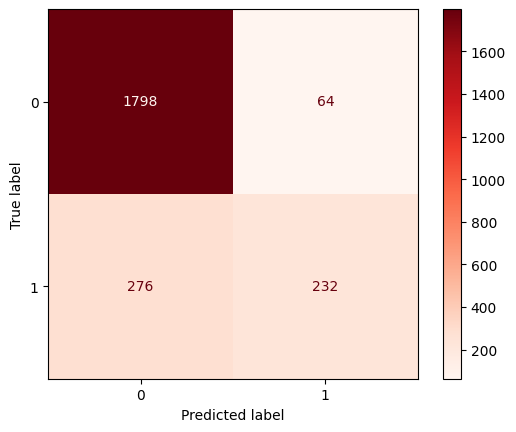

In [53]:
print('Classification Report : \n', classification_report(y_train, y_pred_train_best), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_svm, X_train_features, y_train, cmap='Reds'))

Untuk hasil output dari nilai `Classification Report` dapat disimpulkan bahwa bahwa model memiliki akurasi keseluruhan sebesar 91%, yang menunjukkan bahwa sebagian besar prediksi yang dilakukan oleh model adalah benar. Namun, perlu diperhatikan bahwa kinerja model lebih rendah dibandingkan dengan kelas non-default (0) dengan nilai F1score 58%. Ini menunjukkan bahwa model cenderung lebih baik dalam memprediksi kelas non-default (0) daripada kelas default (1)



Dan Untuk hasil output `Matrix Accuray` dapat diismpulkan bahwa : 

- pada kolom yang bernilai angka 495 memiliki pengertian `True Positif` artinya jumlah data yang secara benar diprediksi sebagai positif oleh model
- pada kolom yang bernilai 1858 artinya `True Negatif` artinya jumlah data yang secara benar diprediksi sebagai negatif oleh model
- Pada kolom yang bernilai 5 artinya `False Posiitif` artinya jumlah data yang salah diprediksi sebagai positif oleh model
- Pada kolom yang bernilai 13 adalah `False Negatif` artinya jumlah data yang salah diprediksi sebagai negatif oleh model


### **Analisa Hasil Prediksi Train**

Adapun tujuan dari analisis hasil prediksi train adalah untuk memahami kinerja model pada data pelatihan. Analisis ini membantu dalam evaluasi dan pemahaman tentang bagaimana model ini dapat mempelajari pola-pola dalam data pelatihan dan sejauh mana model dapat menggeneralisasi pada data yang telah dilihat sebelumnya

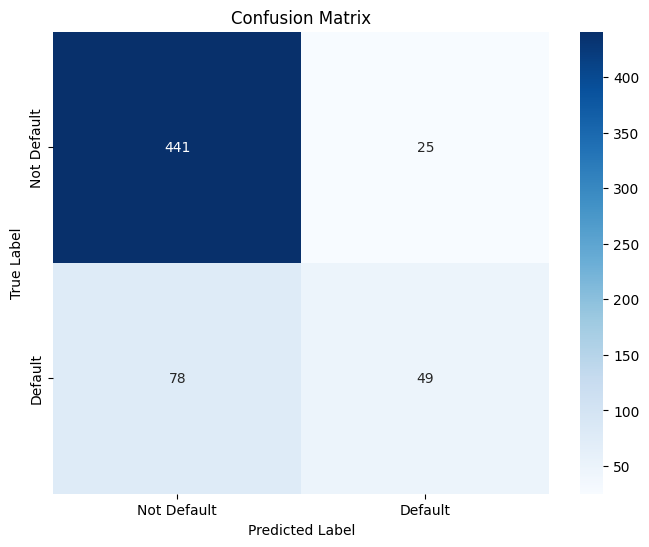

In [54]:
# Melakukan prediksi pada data uji
y_pred_test = best_svm.predict(X_test_features)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Pada proses ini jika ditinjau dari hasil diatas maka saya akan membandingkan hasil sebelum dan sesudah di tuning, berikut cara dalam melakukan prediksi pada data uji menggunakan model `SVM` untuk menampilkan hasil nilai sebelum tuning dan setelah tuning

In [55]:
# Melakukan prediksi pada data uji menggunakan model SVM sebelum tuning
y_pred_test_before_tuning = svm_pipe.predict(X_test_features)

# Melakukan prediksi pada data uji menggunakan model terbaik setelah tuning
y_pred_test_after_tuning = best_svm.predict(X_test_features)

# Laporan klasifikasi sebelum penyetelan (tuning) model
print("Classification Report Sebelum Penyetelan (Tuning) Model:")
print(classification_report(y_test, y_pred_test_before_tuning))

# Laporan klasifikasi setelah penyetelan (tuning) model
print("\nClassification Report Setelah Penyetelan (Tuning) Model:")
print(classification_report(y_test, y_pred_test_after_tuning))


Classification Report Sebelum Penyetelan (Tuning) Model:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89       466
           1       0.66      0.37      0.47       127

    accuracy                           0.82       593
   macro avg       0.75      0.66      0.68       593
weighted avg       0.81      0.82      0.80       593


Classification Report Setelah Penyetelan (Tuning) Model:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       466
           1       0.66      0.39      0.49       127

    accuracy                           0.83       593
   macro avg       0.76      0.67      0.69       593
weighted avg       0.81      0.83      0.81       593



Dari hasil output diatas dapat ditarik kesimpulan bahwa: 

- Setelah penyetelan (tuning) model, terjadi sedikit perbaikan dalam kinerja model pada kelas 1, dengan peningkatan dalam precision, recall, dan F1-score.
- Namun, kelas 1 masih memiliki kinerja yang lebih rendah dibandingkan dengan kelas 0, dengan presisi, recall, dan F1-score yang lebih rendah.
- Perlu dilakukan penyesuaian lebih lanjut atau peningkatan model untuk meningkatkan kinerja pada kelas 1 agar lebih seimbang dengan kelas 0

# 10. Model Saving

Pada bagian `Model Saving` ini merupakan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model, diaman hasil `Model Saving` ini akan digunakan pada proses `Model Inference`

In [56]:
#Save the files
with open('best_svm_model.pkl', 'wb') as file_1:
  pickle.dump(best_svm, file_1)


# 11. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled. Gunakan model terbaik berdasarkan hasil `Model Evaluation`. Hasil ini ada pada `Notebook` yang berbeda

# 11. Conceptual Problems

Pada bagian ini saya akan menjelaskan dan menganalisa informasi dari model yang telah dibuat


1. **Parameter dalam regresi logistik(Coefisien pada logistic regression):**
   yang dikenal sebagai koefisien, menggambarkan pengaruh relatif dari setiap fitur terhadap probabilitas klasifikasi yang dihasilkan. Koefisien positif menunjukkan bahwa peningkatan nilai fitur tersebut akan meningkatkan probabilitas klasifikasi yang diinginkan, sedangkan koefisien negatif menunjukkan hubungan sebaliknya. Dengan kata lain, koefisien pada regresi logistik memberikan informasi tentang sejauh mana setiap fitur berkontribusi terhadap hasil prediksi yang akurat

2. **Parameter Kernel pada Support Vector Machine (SVM):**
   salah satu parameter penting yang digunakan untuk menentukan jenis fungsi kernel yang akan digunakan dalam memetakan data ke dalam ruang dimensi yang lebih tinggi. Parameter ini memungkinkan SVM untuk mengatasi masalah klasifikasi yang tidak linier dengan menciptakan hiperplane pemisah yang lebih kompleks dalam dimensi yang lebih tinggi. Salah satu contoh kernel yang sering digunakan adalah kernel RBF (Radial Basis Function), yang efektif dalam memetakan data ke dalam ruang dimensi tak terhingga. Pemilihan parameter kernel yang sesuai sangat penting karena akan mempengaruhi kinerja SVM dalam memisahkan dan mengklasifikasikan data. Setiap fungsi kernel memiliki karakteristik dan kegunaan yang berbeda tergantung pada bentuk data dan masalah klasifikasi yang dihadap

3. **Cara Memilih K yang Optimal pada K-Nearest Neighbors (KNN):**
   Untuk memilih nilai K yang optimal pada algoritma KNN, saya menggunakan teknik validasi silang (cross-validation) dimana pada `Cross-Validation`untuk membagi data menjadi subset pelatihan dan subset validasi. Uji performa KNN dengan berbagai nilai K pada subset validasi dan pilih nilai K yang memberikan kinerja terbaik secara keseluruhan.

4. **Metrics-Metrics pada Evaluasi Klasifikasi:**
   - **Akurasi (Accuracy):** Mengukur sejauh mana model klasifikasi dapat memprediksi dengan benar. Akurasi dihitung dengan membagi jumlah prediksi yang benar dengan total jumlah prediksi. Namun, akurasi mungkin tidak dapat memberikan gambaran yang akurat jika terdapat ketidakseimbangan kelas dalam dataset
   - **Presisi (Precision):** Mengukur sejauh mana prediksi positif yang dihasilkan oleh model adalah benar. Presisi dihitung dengan membagi jumlah prediksi positif yang benar dengan total jumlah prediksi positif.
   - **Recall (Recall) atau Sensitivitas:** Mengukur sejauh mana model dapat menemukan dan mengklasifikasikan dengan benar semua instance positif. Recall dihitung dengan membagi jumlah prediksi positif yang benar dengan total jumlah instance positif yang sebenarnya.
   - **F1-Score:** F1-score adalah ukuran gabungan dari presisi dan recall. Ini memberikan keseimbangan antara presisi dan recall. F1-score dihitung dengan menggunakan rata-rata harmonis antara presisi dan recall.
   
    Kapan menggunakan:
   - **Accuracy**: Digunakan ketika distribusi kelas dalam dataset seimbang dan kita ingin mengetahui kinerja keseluruhan model.
   - **Precision dan Recall**: Digunakan ketika ada ketidakseimbangan dalam distribusi kelas dan penting untuk memperhitungkan false positives (precision) atau false negatives (recall).
   - **F1 Score**: Digunakan ketika Anda menginginkan perpaduan yang baik antara presisi dan recall dan Anda tidak ingin terlalu fokus pada salah satu dari keduanya secara berlebihan.
   


## 12. Overall Analysis

Dengan mengacu pada perbandingan laporan klasifikasi sebelum dan setelah penyetelan (tuning) model, serta evaluasi kinerja model sebelumnya, saya dapat menyusun analisis keseluruhan mengenai model yang digunakan untuk klasifikasi data ini:

1. **Kinerja Model Sebelum Penyetelan**:
   - Sebelum penyetelan model, kinerja model SVM cukup baik dengan F1-score rata-rata sebesar 0.89 pada proses cross-validation.
   - Meskipun memiliki akurasi yang lumayan baik, model cenderung lebih baik dalam memprediksi kelas non-default (0) daripada kelas default (1). Hal ini terlihat dari perbedaan yang signifikan dalam recall,precission, F1-score dan support antara kedua kelas.
   - Kinerja model pada kelas default (1) cenderung lebih rendah, yang mungkin mengindikasikan adanya kesulitan dalam mengidentifikasi instance (data yang akan diklasifikasikan oleh model) yang sebenarnya termasuk dalam kelas default

2. **Penyetelan (Tuning) Model**:
   - Setelah penyetelan (tuning) model, kinerja model mengalami penaikan angka namun tidak siginifikan perubahannya, terutama dalam model recall dan F1-score terutama jika dilihat dari kelas default (1).
   - Penaikan kinerja ini bisa disebabkan oleh berbagai faktor, bisa disebabkan oleh pengaruh dari proses tuning yang tidak diharapkan namun hal yang paling utama adalah pemilihan paarmeter pada `c` dan `gamma` pada model `grid`

3. **Kesimpulan dan Rekomendasi**:
   - Evaluasi dan penyesuaian parameter: Perhatikan pemilihan parameter yang digunakan dalam model SVM. Parameter C dan gamma pada model grid dapat memiliki pengaruh signifikan terhadap kinerja model. Lakukan evaluasi lebih lanjut terhadap parameter tersebut dengan mengubah nilai-nilai yang berbeda untuk mencari kombinasi parameter yang optimal.

   - Data preprocessing: Coba eksplorasi penggunaan teknik preprocessing data untuk meningkatkan kinerja model. Misalnya, lakukan normalisasi atau penskalaan pada fitur-fitur data, atau terapkan teknik seleksi fitur untuk mengurangi dimensi data dan meningkatkan relevansi fitur terhadap klasifikasi.

   - Penggunaan metode klasifikasi lain: Selain SVM, perlu dipertimbangkan penggunaan metode klasifikasi lain yang mungkin lebih cocok untuk kasus ini. Cobalah metode klasifikasi seperti Decision Tree, Random Forest, Naive Bayes, atau Neural Networks untuk melihat apakah terdapat peningkatan kinerja pada kelas default (1).

   - Penanganan ketidakseimbangan kelas: Jika perbedaan kinerja antara kelas non-default (0) dan default (1) masih signifikan, pertimbangkan strategi penanganan ketidakseimbangan kelas. Misalnya, Anda dapat menggunakan teknik oversampling atau undersampling untuk mengatasi ketidakseimbangan tersebut dan meningkatkan kemampuan model dalam mengklasifikasikan kelas default dengan lebih baik.

   - Cross-validation yang lebih komprehensif: Selain F1-score rata-rata, perlu juga memperhatikan hasil evaluasi lainnya seperti precision, recall, dan support untuk masing-masing kelas. Lakukan cross-validation yang lebih komprehensif dengan memeriksa variasi kinerja model pada setiap lipatan data (fold) untuk mendapatkan pemahaman yang lebih baik tentang kinerja model secara keseluruhan.

   - Analisis lebih lanjut: Lakukan analisis lebih lanjut terhadap data yang digunakan, termasuk pemahaman yang lebih mendalam tentang karakteristik kelas default (1) dan faktor-faktor yang mempengaruhi prediksi yang salah. Ini dapat membantu dalam mengidentifikasi fitur-fitur penting, kekurangan data, atau pola-pola yang perlu diperhatikan dalam pemodelan.

Dengan menganalisis kinerja model secara menyeluruh sebelum dan setelah penyetelan, serta dengan mempertimbangkan rekomendasi-rekomendasi yang telah disebutkan, diharapkan dapat membantu dalam memperbaiki kinerja model klasifikasi untuk kasus ini.
